# Voting classifiers

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [2]:
X,y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [5]:
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf',rnd_clf),('svc', svm_clf)],
    voting='hard'
)

In [6]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [8]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))

('LogisticRegression', 0.864)
('RandomForestClassifier', 0.872)
('SVC', 0.888)
('VotingClassifier', 0.896)


/Users/peilinjiang/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Bagging ensembles

Another approch is to use the same training algorithm for every predictor, but to train them on different random subsets of the training set. When sampling is performed with replacement, this method is called bagging. When sampling is performed without replacement, it is called pasting

In other words, both bagging and pasting allow training instance to be sampled several times across multiple predictors, but only bagging allows training instances to be sampled several times for the same predictor.

Each individual predictor has a higher bias than if it were trained on the original training set, but aggregation reduces both bias and variance. Generrally, the net result is that the ensemble has a similar bias but a lower variance than a single predictor trained on the original training set.

## Bagging and Pasting in Scikit-learn

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [13]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators = 500,
    max_samples = 100, bootstrap = True, n_jobs = -1, random_state=42
)

In [14]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [15]:
accuracy_score(y_pred, y_test)

0.904

In [16]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [17]:
y_pred = tree_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.856

Bootstrap introduces a bit more diversity in subsets that each predictor is trained on, so bagging ends up with slight higher bias than pasting, but this also means that predictors end up being less correlated so the.ensemble's variance is reduced

## Out-of-bagging Evaluation

In [19]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42),
                           n_estimators = 500, bootstrap= True, n_jobs =-1,
                            oob_score = True, max_samples =100
                           )

In [20]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [22]:
bag_clf.oob_score_

0.9226666666666666

In [23]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.92

# Random Forests

In [25]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators =500, max_samples = 1.0, bootstrap = True, n_jobs =-1, random_state=42
)

In [26]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)

In [29]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [30]:
y_pred_rf = rnd_clf.predict(X_test)

In [35]:
import numpy as np
from __future__ import division

In [36]:
np.sum(y_pred == y_pred_rf)/len(y_pred) # almost identical prediction

0.976

In [37]:
from sklearn.datasets import load_iris


In [38]:
iris = load_iris()

In [39]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [40]:
rnd_clf.fit(iris["data"], iris["target"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [42]:
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

('sepal length (cm)', 0.11249225099876374)
('sepal width (cm)', 0.023119288282510326)
('petal length (cm)', 0.44103046436395765)
('petal width (cm)', 0.4233579963547681)


In [43]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

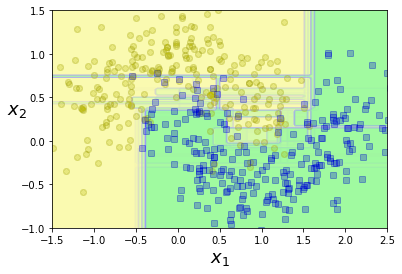

In [47]:
plt.figure(figsize=(6,4))

for i in range(15):
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=16, random_state=42+i)
    indices_with_replacement = np.random.randint(0, len(X_train), len(X_train))
    tree_clf.fit(X[indices_with_replacement], y[indices_with_replacement])
    plot_decision_boundary(tree_clf, X,y, axes=[-1.5, 2.5, -1, 1.5], alpha =0.02, contour=False)

Random forests are very hardy to get a quick understanding of what features actually matter, in particular if you need to perform feature selection

# Boosting

The general idea of most boosting method is to train predictors sequentailly, each trying to correct its predecessor.

## AdaBoost